In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
import os
import skimage.io as pp
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import disk, rectangle, square
selem = square(1)

In [28]:
img = io.imread('42049.jpg')

img4 = io.imread('42049.bmp')

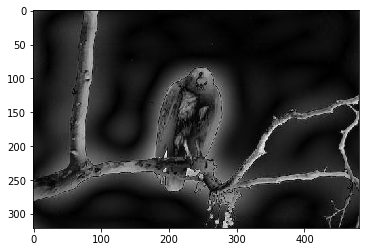

In [29]:
# applying fourier tranformation to convert the image into frequency domain and cutting the low frequency components to enhance edges or high variance in intensity.
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))

#plt.imshow(magnitude_spectrum, cmap='gray')
#plt.show()
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-4:crow+4, ccol-4:ccol+4] = 0
f_ishift = np.fft.ifftshift(fshift)

img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)
plt.imshow(img_back, cmap="gray")
plt.show()

In [30]:
# fourier transformed image
img2=np.copy(img_back)
# image without high pass filter
img5=np.copy(img)
print(img2.shape)
# using mark function to check the change in intensity of 8 -nearest neighbour of every pixel to identify the pixel is boundary pixel or not. Here intensity difference to identify a pixel as boundarty pixel is taken as 50.
def  mark(img2,img3,i,j):
    a = (img2[i][j]-50)
    b = (img2[i][j]+50)
    if(((i-1)>=0) and ((j-1)>=0) and ((img2[i-1][j-1] <a) or (img2[i-1][j-1] >b))):
        img3[i][j]=255
        return img3
    if(((i-1)>=0) and ((img2[i-1][j] <a) or (img2[i-1][j] >b))):
        img3[i][j]=255
        return img3
    if(((i-1)>=0) and ((j+1)<=(img2.shape[1]-1)) and ((img2[i-1][j+1] <a) or (img2[i-1][j+1] >b))):
        img3[i][j]=255
        return img3
    if(((j-1)>=0) and ((img2[i][j-1] <a) or (img2[i][j-1] >b))):
        img3[i][j]=255
        return img3
    if(((j+1)<=(img2.shape[1]-1)) and ((img2[i][j+1] <a) or (img2[i][j+1] >b))):
        img3[i][j]=255
        return img3
    if(((i+1)<=(img2.shape[0]-1)) and ((j-1)>=0) and ((img2[i+1][j-1] <a) or (img2[i+1][j-1] >b))):
        img3[i][j]=255
        return img3
    if(((i+1)<=(img2.shape[0]-1)) and ((img2[i+1][j] <a) or (img2[i+1][j] >b))):
        img3[i][j]=255
        return img3
    if(((i+1)<=(img2.shape[0]-1)) and ((j+1)<=(img2.shape[1]-1)) and ((img2[i+1][j+1] <a) or (img2[i+1][j+1] >b))):
        img3[i][j]=255
        return img3

    img3[i][j]=0
    return img3

(321, 481)


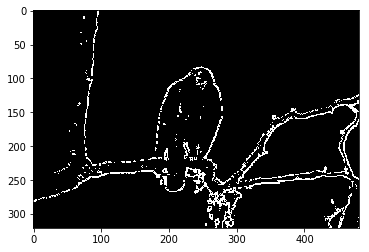

In [31]:
# making copy of high pass filtered image.
img3=np.copy(img2)
# making copy of normal image.
img6= np.copy(img5)
#  applying algorithm on filtered image followed by closing morphological operator(dilation fllowed by erosion).
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        
        mark(img2,img3,i,j)
            
dilated = dilation(img3, selem)
erosion2 = erosion(dilated, selem)
img1=erosion2
# applying same algorithm on normal image followed by closing morphological operator.
for i in range(img5.shape[0]):
    for j in range(img5.shape[1]):
        
        mark(img5,img6,i,j)
            
dilated1 = dilation(img6, selem)
erosion1 = erosion(dilated1, selem)
img7=erosion1
# displaying the result on filtered image.
plt.imshow(img1, cmap="gray")
plt.show()



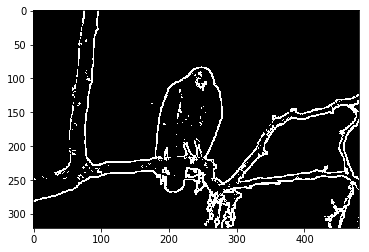

In [32]:
# displaying the result on normal image.

plt.imshow(img7,cmap="gray")
plt.show()

In [33]:
# printing the recall, precision and fscore on normal image.

fp1 = float(np.count_nonzero(np.greater(img4, img6)))
fn1 = float(np.count_nonzero(np.greater(img6, img4)))
tp1 = float(np.count_nonzero(np.logical_and(np.equal(img4, img6), np.equal(img4, np.zeros((len(img6), len(img3[0])))))))
recall1 = float(tp1/(tp1+fn1))
precision1 = float(tp1/(tp1+fp1))
fscore1 = (2*recall1*precision1)/(precision1+recall1)
print(recall1, precision1, fscore1)

(0.9299836968554387, 0.9628381898378078, 0.946125808829552)


In [34]:
# printing the recall, precision and fscore on filterd image.

fp = float(np.count_nonzero(np.greater(img4, img3)))
fn = float(np.count_nonzero(np.greater(img3, img4)))
tp = float(np.count_nonzero(np.logical_and(np.equal(img4, img3), np.equal(img4, np.zeros((len(img3), len(img3[0])))))))
recall = float(tp/(tp+fn))
precision = float(tp/(tp+fp))
fscore = float((2*recall*precision)/(precision+recall))
print(recall, precision, fscore)

(0.9507068566110285, 0.9510686737571783, 0.9508877307658334)


It is clearly visible that image without the implementation of high pass filter is giving better contour as compared tothe filtered image only because the image in the dataset are not having high intensity variations. It depends on image whether the high pass filter will give better result or not.


The fscore value of the filtered image is better than that of a normal image for almost all the cases in the dataset (19 images).